# Example: Run an AC power flow in PandaPower
Created by: FGL, 13/03/2025 

**Email:** [fglongatt@fglongatt.org](fglongatt@fglongatt.org)

**GitHub respositorty:**  [https://github.com/fglongatt ](https://github.com/fglongatt) 

This Jupyter notebook is created to import a pre-existing network model inside PandaPower and then present information about the network model and finally run a power flow showing the numerical results.

## Import relevant packages

In [40]:
import numpy as np
import pandas as pd
import pandapower as pp
import pandapower.control as control
import pandapower.networks as nw
import pandapower.timeseries as timeseries
from pandapower.timeseries.data_sources.frame_data import DFData
import pandapower.plotting as plt
import matplotlib.pyplot as mplt            

Pandapower is equipped with an excellent set of networks. 

The Pandapower networks module contains example networks, simple test networks, randomly generated networks, CIGRE test networks, IEEE case files and synthetic low voltage networks from Georg Kerber and Lindner et al. and Dickert et al.

Read more here: https://pandapower.readthedocs.io/en/v2.0.0/networks.html#

This example uses the json file **case9.json**, whose data origin is PYPOWER. 
 
**NOTE: PandaPower website claims this network was published in Anderson and Fouad’s book ‘Power System Control and Stability’ for the first time in 1980.
However, this is a modified version of the original network.**

## Import the Case9.json

In [41]:
net = nw.case9()

## Plot the graph of the network
PandaPower allows plotting the graph of the networks

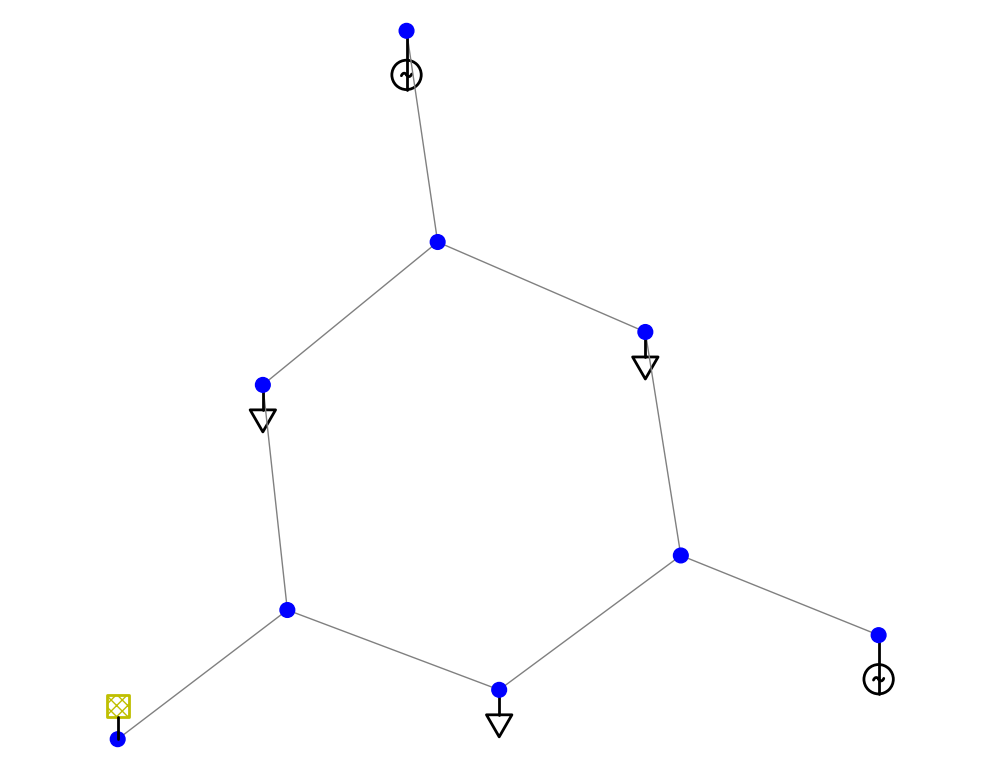

<Axes: >

In [42]:
plt.simple_plot(net,  plot_loads=True, plot_gens=True,load_size=2.0, gen_size=2.0,scale_size=True)            

## Display the summary of the network datta
Display the network data

In [43]:
net

This pandapower network includes the following parameter tables:
   - bus (9 elements)
   - load (3 elements)
   - gen (2 elements)
   - ext_grid (1 element)
   - line (9 elements)
   - poly_cost (3 elements)
   - bus_geodata (9 elements)

## Diplay the bus data

In [44]:
net.bus

,name,vn_kv,type,zone,in_service,max_vm_pu,min_vm_pu
0,1,345.0,b,1.0,True,1.1,0.9
1,2,345.0,b,1.0,True,1.1,0.9
2,3,345.0,b,1.0,True,1.1,0.9
3,4,345.0,b,1.0,True,1.1,0.9
4,5,345.0,b,1.0,True,1.1,0.9
5,6,345.0,b,1.0,True,1.1,0.9
6,7,345.0,b,1.0,True,1.1,0.9
7,8,345.0,b,1.0,True,1.1,0.9
8,9,345.0,b,1.0,True,1.1,0.9


## Display the load data

In [45]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type,controllable
0,None,4,90.0,30.0,0.0,0.0,NaN,1.0,True,None,False
1,None,6,100.0,35.0,0.0,0.0,NaN,1.0,True,None,False
2,None,8,125.0,50.0,0.0,0.0,NaN,1.0,True,None,False


## Display the generator data

In [46]:
net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type,controllable,max_p_mw,min_p_mw
0,None,1,163.0,1.0,NaN,-300.0,300.0,1.0,False,True,0.0,None,True,300.0,10.0
1,None,2,85.0,1.0,NaN,-300.0,300.0,1.0,False,True,0.0,None,True,270.0,10.0


## Display the External Grid data 

In [47]:
net.ext_grid

,name,bus,vm_pu,va_degree,slack_weight,in_service,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,None,0,1.0,0.0,1.0,True,250.0,10.0,300.0,-300.0


## Display the cost function

The cost function is specified element-wise and is organized in tables as well, which makes the parametrization user-friendly. 
There are two options for formulating a cost function for each element: 
1. A piecewise linear function with n data points.
2. An n-polynomial cost function.

In this case, the case9 network is already populated with an n= two polynomial cost function.

$$C(P) = c_2 \cdot P^2 + c_1 \cdot P + c_0$$

Where:
- $C(P)$: Total cost as a function of active power \(P\) (measured in MW).
- $c_2$: Quadratic cost coefficient (e.g., in EUR/MW²).
- $c_1$: Linear cost coefficient (e.g., in EUR/MW).
- $c_0$: Constant cost (e.g., in EUR), representing fixed costs.


In [48]:
net.poly_cost

,element,et,cp0_eur,cp1_eur_per_mw,cp2_eur_per_mw2,cq0_eur,cq1_eur_per_mvar,cq2_eur_per_mvar2
0,0,ext_grid,150.0,5.0,0.1100,0.0,0.0,0.0
1,0,gen,600.0,1.2,0.0850,0.0,0.0,0.0
2,1,gen,335.0,1.0,0.1225,0.0,0.0,0.0


* cp0_eur=0 (float) - Offset active power costs in euro
* cp1_eur_per_mw (float) - Linear costs per MW
* cp2_eur_per_mw2=0 (float) - Quadratic costs per MW

* cq0_eur=0 (float) - Offset reactive power costs in euro
* cq1_eur_per_mvar=0 (float) - Linear costs per Mvar
* cq2_eur_per_mvar2=0 (float) - Quadratic costs per Mvar

## Run a load flow

In [49]:
pp.runpp(net, algorithm="nr", init="flat", max_iteration=20, tolerance_mva=1e-8)

# Display the Bus Results

In [50]:
net.res_bus  # Bus voltages

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-71.954702,-24.068958
1,1.000000,9.668741,-163.000000,-14.460120
2,1.000000,4.771073,-85.000000,3.649026
3,0.987007,-2.406644,0.000000,0.000000
4,0.975472,-4.017264,90.000000,30.000000
5,1.003375,1.925602,0.000000,0.000000
6,0.985645,0.621545,100.000000,35.000000
7,0.996185,3.799120,0.000000,0.000000
8,0.957621,-4.349934,125.000000,50.000000


## Display the Line Result

In [51]:
net.res_line  # Line loading

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,71.954702,24.068958,-71.954702,-20.753045,0.000000e+00,3.315913,0.126973,0.126973,0.126973,1.000000,0.000000,0.987007,-2.406644,30.349415
1,30.728280,-0.585851,-30.554686,-13.687950,1.735947e-01,-14.273801,0.052110,0.057438,0.057438,0.987007,-2.406644,0.975472,-4.017264,13.728971
2,-59.445314,-16.312050,60.893866,-12.427470,1.448551e+00,-28.739519,0.105752,0.103655,0.105752,0.975472,-4.017264,1.003375,1.925602,42.128485
3,85.000000,-3.649026,-85.000000,7.890678,0.000000e+00,4.241653,0.142377,0.142377,0.142377,1.000000,4.771073,1.003375,1.925602,28.359430
4,24.106134,4.536791,-24.010648,-24.400762,9.548639e-02,-19.863971,0.040911,0.058123,0.058123,1.003375,1.925602,0.985645,0.621545,23.154484
5,-75.989352,-10.599238,76.495564,0.256239,5.062121e-01,-10.342998,0.130268,0.128505,0.130268,0.985645,0.621545,0.996185,3.799120,31.136975
6,-163.000000,2.276190,163.000000,14.460120,2.842171e-14,16.736309,0.273848,0.273848,0.273848,0.996185,3.799120,1.000000,9.668741,65.456056
7,86.504436,-2.532429,-84.039887,-14.281983,2.464549e+00,-16.814412,0.145380,0.148969,0.148969,0.996185,3.799120,0.957621,-4.349934,35.606908
8,-40.960113,-35.718017,41.226421,21.338895,2.663082e-01,-14.379122,0.094972,0.078708,0.094972,0.957621,-4.349934,0.987007,-2.406644,22.700497


## Calculating the total network losess

In [52]:
line_losses = net.res_line.pl_mw.sum()  # Line losses
trafo_losses = net.res_trafo.pl_mw.sum()  # Transformer losses
total_losses = line_losses + trafo_losses

## Displaying the total network losses

In [53]:
print(' Total Active Power Losses = %4.4f MW'%total_losses)

 Total Active Power Losses = 4.9547 MW


# **Be part of our community** 
  * https://www.linkedin.com/in/francisco-gonzalez-longatt/ 
  * https://www.youtube.com/user/fmglongatt 
  * https://twitter.com/fglongatt 
  * https://www.instagram.com/fglongatt/ 
